In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Resume Screening.csv')
data.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


#Look and visualize category

In [2]:
print(data['Category'].unique())
print("\n""total categories: "+format(len(data['Category'].unique())))

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']

total categories: 25


In [3]:
print(data['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


In [4]:
import seaborn as sns
# plt.figure(figsize=(20,10))
# sns.countplot(x="Category",data=data)
# plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x194cbfa30e0>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

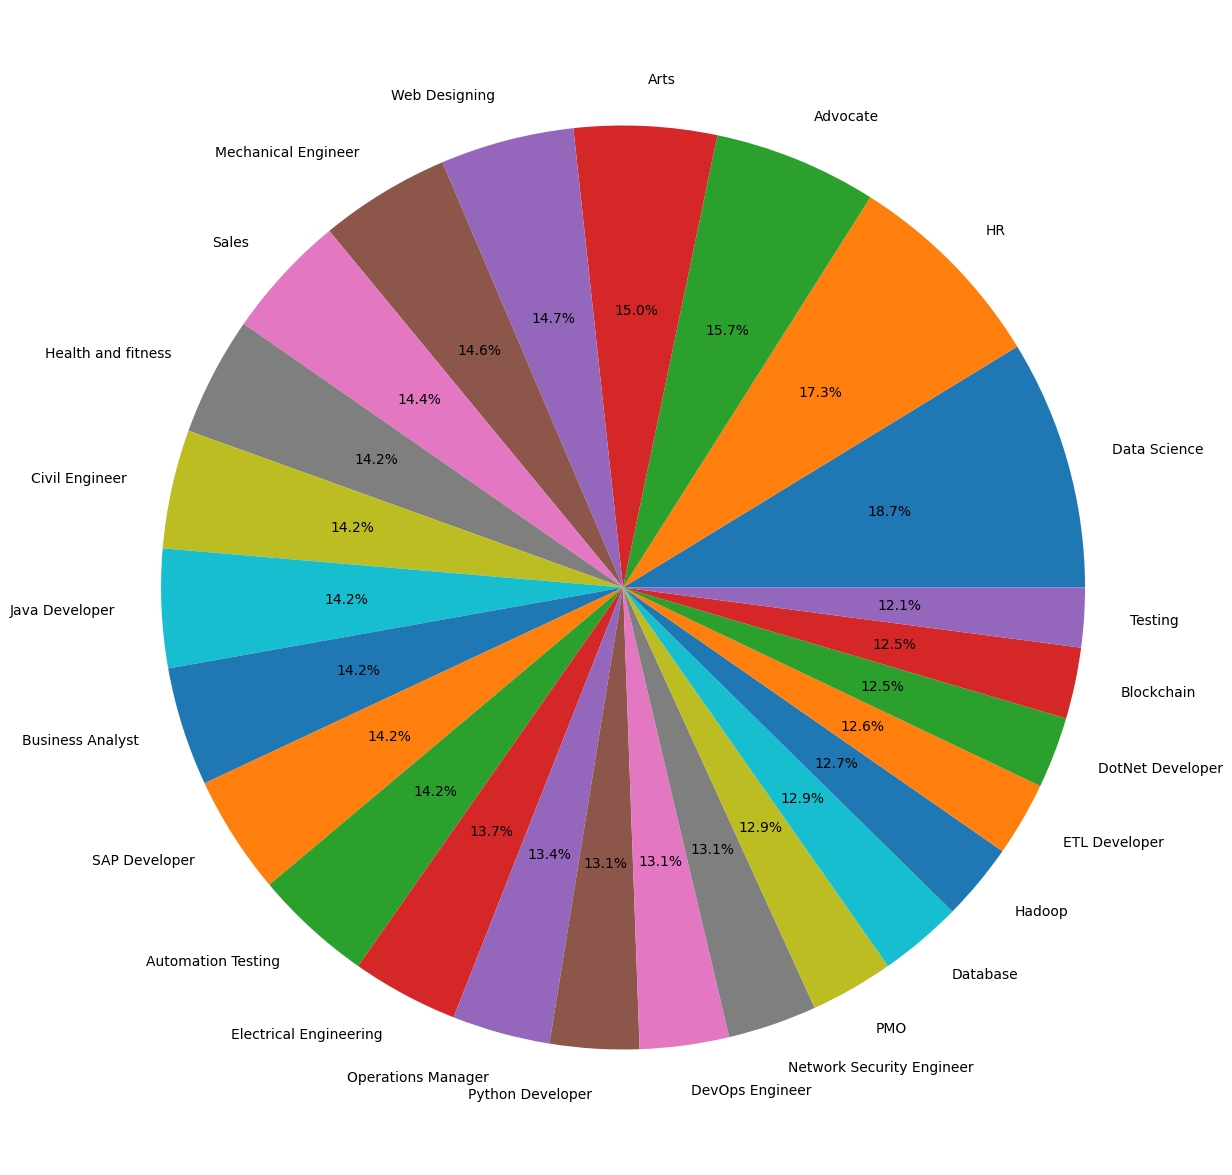

In [5]:
counts=data['Category'].value_counts()
labels= data['Category'].unique()
plt.figure(figsize=(15,15))
plt.pie(counts,labels=labels,autopct='1%.1f%%')


In [6]:
data['Category'][0]

'Data Science'

In [7]:
#data['Resume'][0]

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s', ' ', txt)
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)
    cleanText = re.sub(r'@\S+', '  ', cleanText)  
    cleanText = cleanText.lower()
    cleanText =cleanText.split()
    cleanText =[ps.stem(word) for word in cleanText if not word in stopwords.words('english')]
    cleanText =' '.join(cleanText)
    cleanText = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub(r'\s+', ' ', cleanText).strip()
    return cleanText

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data['Resume'] = data['Resume'].apply(lambda x: cleanResume(x))

In [10]:
data['Resume']

0      skill program languages python pandas numpy sc...
1      educ detail may 2013 may 2017 b e uit rgpv dat...
2      area interest deep learning control system des...
3      skill r python sap hana tableau sap hana sql s...
4      educ detail mca ymcaust faridabad haryana data...
                             ...                        
957    comput skills profici ms offic word basic exce...
958    willing ept challenges posit thinking good lea...
959    person skill quick learner eager learn new thi...
960    comput skill softwar knowledg ms power point m...
961    skill set os window xp 7 8 8 1 10 databas mysq...
Name: Resume, Length: 962, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

In [12]:
print(data['Category'])

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(data['Resume'])
requiredText  = tfidf.transform(data['Resume'])

In [14]:
print(requiredText)

  (0, 118)	0.0658367266161736
  (0, 285)	0.02587234648524193
  (0, 310)	0.047259354482104866
  (0, 331)	0.024349479398753718
  (0, 458)	0.08654124931513864
  (0, 459)	0.08654124931513864
  (0, 462)	0.17684499298374032
  (0, 467)	0.018036914473680225
  (0, 477)	0.026717178510994023
  (0, 488)	0.047259354482104866
  (0, 492)	0.030673219271010396
  (0, 585)	0.03759000061794137
  (0, 605)	0.1079240966409398
  (0, 606)	0.05210417068866656
  (0, 610)	0.09304919993343921
  (0, 626)	0.042027011381385516
  (0, 660)	0.039442705439783676
  (0, 747)	0.014955250495110269
  (0, 761)	0.09451870896420973
  (0, 796)	0.024496060226625666
  (0, 848)	0.047259354482104866
  (0, 881)	0.04130754576756794
  (0, 883)	0.027782135061301356
  (0, 884)	0.03607520266684859
  (0, 948)	0.036848221810893575
  :	:
  (961, 5369)	0.034860476463450245
  (961, 5382)	0.03863109231677763
  (961, 5484)	0.028257125011057135
  (961, 5544)	0.08362270358043884
  (961, 5640)	0.030606294339319627
  (961, 5656)	0.04011968494786395
 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, data['Category'], test_size=0.2, random_state=42)

In [17]:
## This is a multiclassification problem we use KNN 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [19]:
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.9793
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  1  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  

In [20]:
import pickle

# Save trained model
with open('clf.pkl', 'wb') as f:
    pickle.dump(knn_model, f)  # or clf if that’s your model variable

# Save TF-IDF vectorizer
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)  # or tfidf if that’s your vectorizer

# Save LabelEncoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
